# Drowsiness Detection using Mediapipe in Python

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
import os
import glob

mp_facemesh = mp.solutions.face_mesh
mp_drawing  = mp.solutions.drawing_utils
denormalize_coordinates = mp_drawing._normalized_to_pixel_coordinates

%matplotlib inline

**Get all the landmarks points for both eyes.**

In [2]:
# Landmark points corresponding to left eye
all_left_eye_idxs = list(mp_facemesh.FACEMESH_LEFT_EYE)
all_left_eye_idxs = set(np.ravel(all_left_eye_idxs)) # flatten and remove duplicates
print("Left eye landmarks:", all_left_eye_idxs)

# Landmark points corresponding to right eye
all_right_eye_idxs = list(mp_facemesh.FACEMESH_RIGHT_EYE)
all_right_eye_idxs = set(np.ravel(all_right_eye_idxs)) # flatten and remove duplicates
print("Right eye landmarks:", all_right_eye_idxs)

# Combined for plotting use - Landmark points for both eye
all_idxs = all_left_eye_idxs.union(all_right_eye_idxs)

Left eye landmarks: {384, 385, 386, 387, 388, 390, 263, 362, 398, 466, 373, 374, 249, 380, 381, 382}
Right eye landmarks: {160, 33, 161, 163, 133, 7, 173, 144, 145, 246, 153, 154, 155, 157, 158, 159}


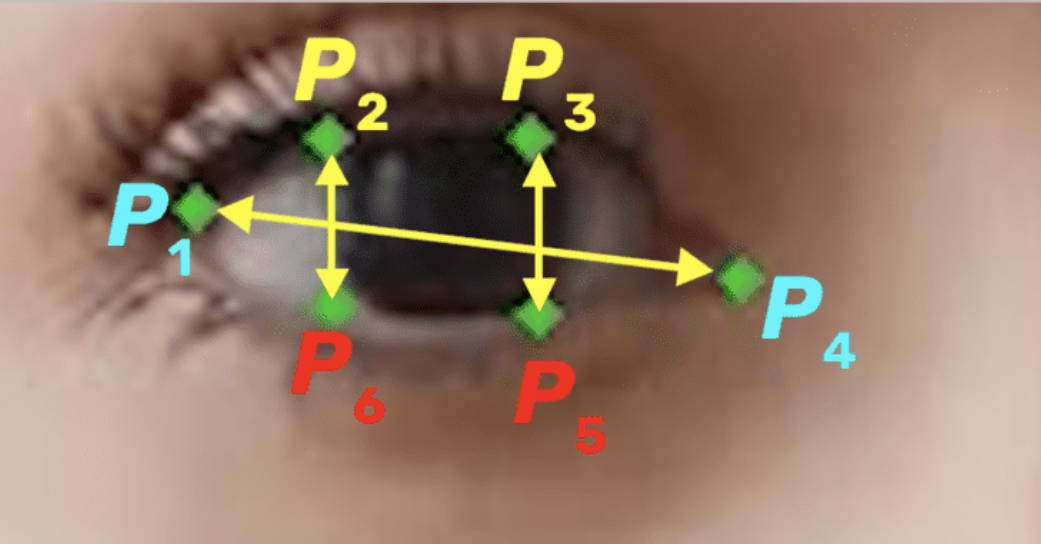

In [3]:
# The chosen 12 points:   P1,  P2,  P3,  P4,  P5,  P6
chosen_left_eye_idxs  = [362, 385, 387, 263, 373, 380]
chosen_right_eye_idxs = [33, 160, 158, 133, 153, 144]

all_chosen_idxs = chosen_left_eye_idxs + chosen_right_eye_idxs

In [11]:
def plot(
    *,
    img_dt,
    img_eye_lmks=None,
    img_eye_lmks_chosen=None,
    face_landmarks=None,
    ts_thickness=1,
    ts_circle_radius=2,
    lmk_circle_radius=3,
    name="1",
):
    # For plotting Face Tessellation
    image_drawing_tool = img_dt 
    
     # For plotting all eye landmarks
    image_eye_lmks = img_dt.copy() if img_eye_lmks is None else img_eye_lmks
    
    # For plotting chosen eye landmarks
    img_eye_lmks_chosen = img_dt.copy() if img_eye_lmks_chosen is None else img_eye_lmks_chosen

    # Initializing drawing utilities for plotting face mesh tessellation
    connections_drawing_spec = mp_drawing.DrawingSpec(
        thickness=ts_thickness, circle_radius=ts_circle_radius, color=(255, 255, 255)
    )

    # Draw landmarks on face using the drawing utilities.
    mp_drawing.draw_landmarks(
        image=image_drawing_tool,
        landmark_list=face_landmarks,
        connections=mp_facemesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=connections_drawing_spec,
    )

    # Get the object which holds the x, y and z coordinates for each landmark
    landmarks = face_landmarks.landmark

    # Iterate over all landmarks.
    # If the landmark_idx is present in either all_idxs or all_chosen_idxs,
    # get the denormalized coordinates and plot circles at those coordinates.

    for landmark_idx, landmark in enumerate(landmarks):
        if landmark_idx in all_idxs:
            pred_cord = denormalize_coordinates(landmark.x, landmark.y, imgW, imgH)
            cv2.circle(image_eye_lmks, pred_cord, lmk_circle_radius, (255, 255, 255), -1)

        if landmark_idx in all_chosen_idxs:
            pred_cord = denormalize_coordinates(landmark.x, landmark.y, imgW, imgH)
            cv2.circle(img_eye_lmks_chosen, pred_cord, lmk_circle_radius, (255, 255, 255), -1)

    # Initialize a matplotlib figure.
    fig = plt.figure(figsize=(20, 15))
    fig.set_facecolor("white")

    # Plot post-processed images
    plt.subplot(1, 3, 1)
    plt.title("Face Mesh Tessellation", fontsize=18)
    plt.imshow(image_drawing_tool)
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("All eye landmarks", fontsize=18)
    plt.imshow(image_eye_lmks)
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(img_eye_lmks_chosen)
    plt.title("Chosen landmarks", fontsize=18)
    plt.axis("off")
#     plt.subplots_adjust(left=0.02, right=0.98, top=None, bottom=0.4, hspace=1.0)
#     plt.savefig(f'image_{name}.png', dpi=200.0, bbox_inches="tight")
    plt.show()
    plt.close()
    return

In [4]:
def plot(
    *,
    img_dt,
    img_eye_lmks=None,
    img_eye_lmks_chosen=None,
    face_landmarks=None,
    ts_thickness=1,
    ts_circle_radius=2,
    lmk_circle_radius=3,
    ver = 1,
):
    # For plotting Face Tessellation
    image_drawing_tool = img_dt.copy() 
    
     # For plotting all eye landmarks
    img_eye_lmks = img_dt.copy() if img_eye_lmks is None else img_eye_lmks
    
    # For plotting chosen eye landmarks
    img_eye_lmks_chosen = img_dt.copy() if img_eye_lmks_chosen is None else img_eye_lmks_chosen

    # Initializing drawing utilities for plotting face mesh tessellation
    connections_drawing_spec = mp_drawing.DrawingSpec(
        thickness=ts_thickness, circle_radius=ts_circle_radius, color=(255, 255, 255)
    )

    # Draw landmarks on face using the drawing utilities.
    mp_drawing.draw_landmarks(
        image=image_drawing_tool,
        landmark_list=face_landmarks,
        connections=mp_facemesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=connections_drawing_spec,
    )

    # Get the object which holds the x, y and z coordinates for each landmark
    landmarks = face_landmarks.landmark

    # Iterate over all landmarks.
    # If the landmark_idx is present in either all_idxs or all_chosen_idxs,
    # get the denormalized coordinates and plot circles at those coordinates.

    for landmark_idx, landmark in enumerate(landmarks):
        if landmark_idx in all_idxs:
            pred_cord = denormalize_coordinates(landmark.x, landmark.y, imgW, imgH)
            cv2.circle(img_eye_lmks, pred_cord, lmk_circle_radius, (255, 255, 255), -1)

        if landmark_idx in all_chosen_idxs:
            pred_cord = denormalize_coordinates(landmark.x, landmark.y, imgW, imgH)
            cv2.circle(img_eye_lmks_chosen, pred_cord, lmk_circle_radius, (255, 255, 255), -1)

    if ver == 1:
        # Initialize a matplotlib figure.
        fig = plt.figure(figsize=(20, 15))
        fig.set_facecolor("white")
        
        # Plot post-processed images
        plt.subplot(1, 3, 1)
        plt.imshow(img_dt)
        plt.title("Original Image", fontsize=18)
        plt.axis("off")
        
        plt.subplot(1, 3, 2)
        plt.title("Face Mesh Tessellation", fontsize=18)
        plt.imshow(image_drawing_tool)
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(img_eye_lmks_chosen)
        plt.title("Result", fontsize=18)
        plt.axis("off")
    
    elif ver == 2:
        # Initialize a matplotlib figure.
        fig = plt.figure(figsize=(15, 15))
        fig.set_facecolor("white")
        
        # Plot post-processed images
        plt.subplot(2, 2, 1)
        plt.imshow(img_dt)
        plt.title("Original Image", fontsize=15)
        plt.axis("off")

        plt.subplot(2, 2, 2)
        plt.title("Face Mesh Tessellation", fontsize=15)
        plt.imshow(image_drawing_tool)
        plt.axis("off")

        plt.subplot(2, 2, 3)
        plt.title("All eye landmarks", fontsize=15)
        plt.imshow(img_eye_lmks)
        plt.axis("off")

        plt.subplot(2, 2, 4)
        plt.imshow(img_eye_lmks_chosen)
        plt.title("Chosen landmarks", fontsize=15)
        plt.axis("off")

    elif ver == 3:
        # Initialize a matplotlib figure.
        fig = plt.figure(figsize=(20, 15))
        fig.set_facecolor("white")

        # Plot post-processed images
        plt.subplot(1, 3, 1)
        plt.title("Face Mesh Tessellation", fontsize=18)
        plt.imshow(image_drawing_tool)
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.title("All eye landmarks", fontsize=18)
        plt.imshow(img_eye_lmks)
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(img_eye_lmks_chosen)
        plt.title("Chosen landmarks", fontsize=18)
        plt.axis("off")
        #     plt.subplots_adjust(left=0.02, right=0.98, top=None, bottom=0.4, hspace=1.0)
        #     plt.savefig(f'image_{name}.png', dpi=200.0, bbox_inches="tight")
    
    plt.show()
    plt.close()
    return

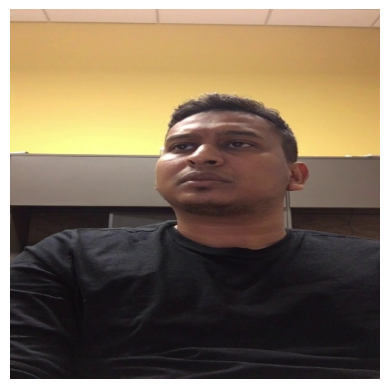

True


In [72]:
# Load an image. 

image = cv2.imread("D:/Code/Language/Python/DAP_Drowsiness/Data/Faces/not_drown/63.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to RGB

image = np.ascontiguousarray(image)

imgH, imgW, _ = image.shape

plt.imshow(image)
plt.axis('off')
plt.show()

# Running inference using static_image_mode 

with mp_facemesh.FaceMesh(
    static_image_mode=True,        # Default=False
    max_num_faces=1,               # Default=1
    refine_landmarks=False,        # Default=False
    min_detection_confidence=0.5,  # Default=0.5
    min_tracking_confidence= 0.5,  # Default=0.5
) as face_mesh:
    
    results = face_mesh.process(image)

print(bool(results.multi_face_landmarks)) # Indicates whether any detections are available or not.

In [22]:
# Get the first landmark point on the first detected face

landmark_0 = results.multi_face_landmarks[0].landmark[0]
print(landmark_0)

landmark_0_x = landmark_0.x * imgW
landmark_0_y = landmark_0.y * imgH
landmark_0_z = landmark_0.z * imgW # according to documentation

print("X:", landmark_0_x)
print("Y:", landmark_0_y)
print("Z:", landmark_0_z)

print()
print("Total Length of '.landmark':", len(results.multi_face_landmarks[0].landmark))

x: 0.47074273228645325
y: 0.652897298336029
z: -0.04123007506132126

X: 235.37136614322662
Y: 326.4486491680145
Z: -20.61503753066063

Total Length of '.landmark': 468


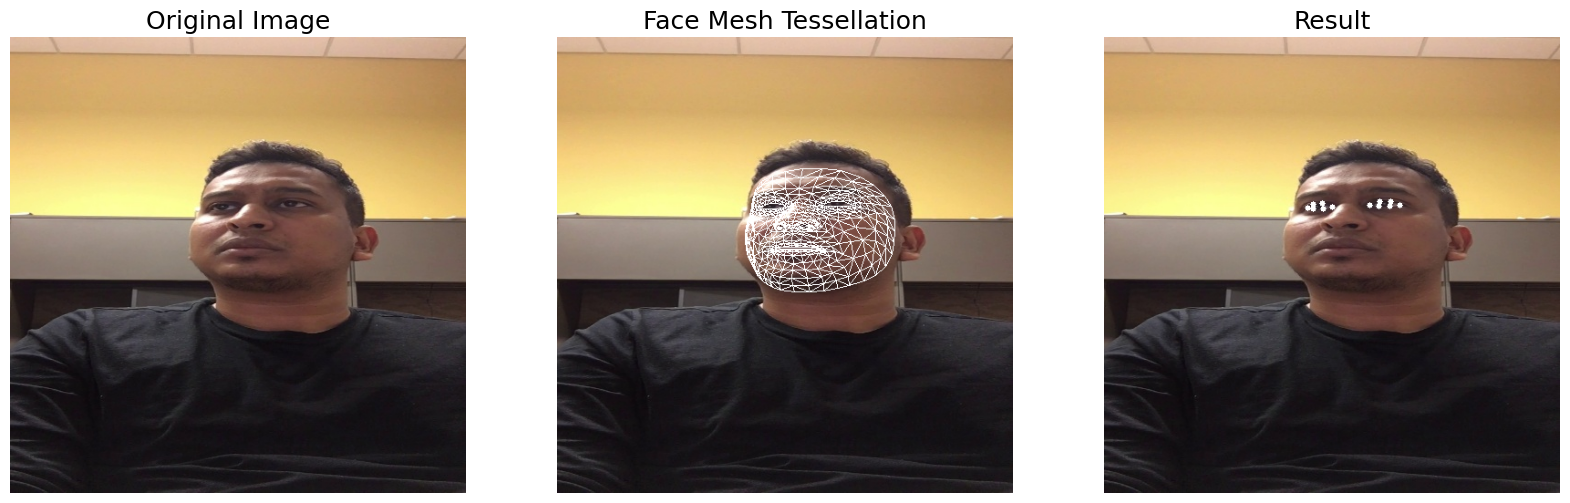

In [73]:
# If detections are available.
if results.multi_face_landmarks:
    
    # Iterate over detections of each face. Here, we have max_num_faces=1, 
    # so there will be at most 1 element in the 'results.multi_face_landmarks' list            
    # Only one iteration is performed.

    for face_id, face_landmarks in enumerate(results.multi_face_landmarks):    
        _ = plot(img_dt=image.copy(), face_landmarks=face_landmarks, ver=1)

In [11]:
def distance(point_1, point_2):
    """Calculate l2-norm between two points"""
    dist = sum([(i - j) ** 2 for i, j in zip(point_1, point_2)]) ** 0.5
    return dist

In [12]:
def get_ear(landmarks, refer_idxs, frame_width, frame_height):
    """
    Calculate Eye Aspect Ratio for one eye.

    Args:
        landmarks: (list) Detected landmarks list
        refer_idxs: (list) Index positions of the chosen landmarks
                            in order P1, P2, P3, P4, P5, P6
        frame_width: (int) Width of captured frame
        frame_height: (int) Height of captured frame

    Returns:
        ear: (float) Eye aspect ratio
    """
    try:
        # Compute the euclidean distance between the horizontal
        coords_points = []
        for i in refer_idxs:
            lm = landmarks[i]
            coord = denormalize_coordinates(lm.x, lm.y, frame_width, frame_height)
            coords_points.append(coord)

        # Eye landmark (x, y)-coordinates
        P2_P6 = distance(coords_points[1], coords_points[5])
        P3_P5 = distance(coords_points[2], coords_points[4])
        P1_P4 = distance(coords_points[0], coords_points[3])

        # Compute the eye aspect ratio
        ear = (P2_P6 + P3_P5) / (2.0 * P1_P4)

    except:
        ear = 0.0
        coords_points = None

    return ear, coords_points

**Calculating `EAR` for the previously detected landmarks.**

In [13]:
def calculate_avg_ear(landmarks, left_eye_idxs, right_eye_idxs, image_w, image_h):
    # Calculate Eye aspect ratio 
    left_ear,  _ = get_ear(landmarks, left_eye_idxs,  imgW, imgH)
    right_ear, _ = get_ear(landmarks, right_eye_idxs, imgW, imgH)

    Avg_EAR = (left_ear + right_ear) / 2
    return Avg_EAR

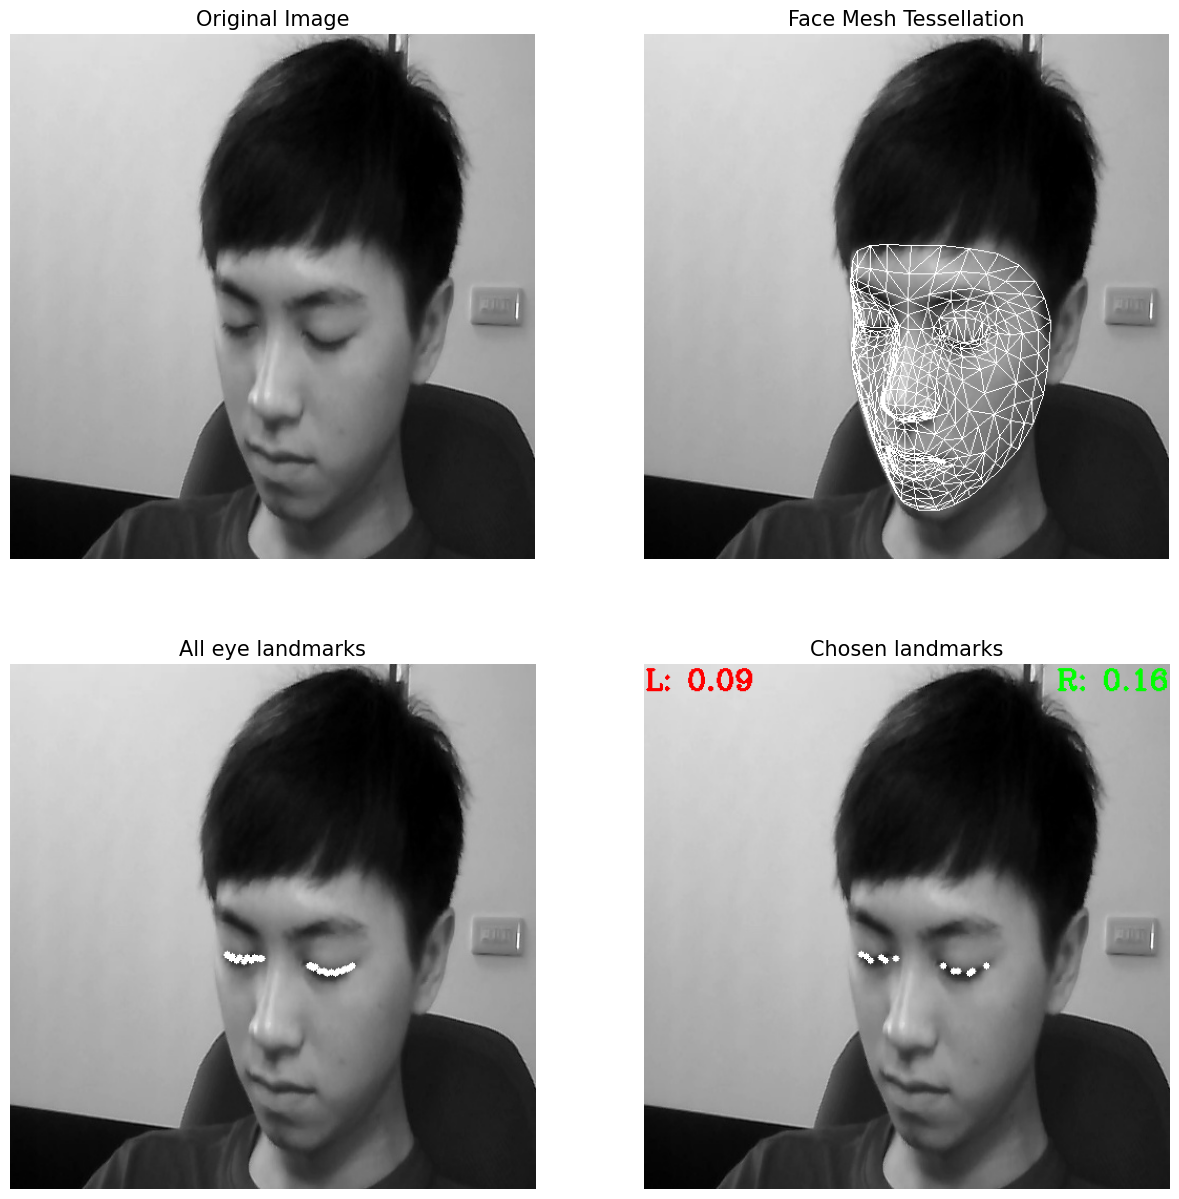

In [134]:
import random

folder_path = "D:/Code/Language/Python/DAP_Drowsiness/Data/Faces/drown/" 
files = os.listdir(folder_path)

# image_eyes_open  = cv2.imread("test-open-eyes.jpg")[:, :, ::-1]
# image = cv2.imread("D:/Code/Language/Python/DAP_Drowsiness/Data/Faces/not_drown/3433.jpg")[:,:,::-1]
# image = cv2.imread("D:/Code/Language/Python/DAP_Drowsiness/Data/Faces/drown/360.jpg")[:,:,::-1]
image = cv2.imread(os.path.join(folder_path, random.choice(files)))[:, :, ::-1]

# image_eyes_close = cv2.imread("test-close-eyes.jpg")[:, :, ::-1]

for idx, image in enumerate([image]):
    
    image = np.ascontiguousarray(image)
    imgH, imgW, _ = image.shape

    # Creating a copy of the original image for plotting the EAR value
    custom_chosen_lmk_image = image.copy()

    # Running inference using static_image_mode
    with mp_facemesh.FaceMesh(refine_landmarks=True) as face_mesh:
        results = face_mesh.process(image)

        # If detections are available.
        if results.multi_face_landmarks:

            # Iterate over detections of each face. Here, we have max_num_faces=1, so only one iteration is performed.
            for face_id, face_landmarks in enumerate(results.multi_face_landmarks):

                landmarks = face_landmarks.landmark
                # EAR = calculate_avg_ear(landmarks, chosen_left_eye_idxs, chosen_right_eye_idxs, imgW, imgH)
                left_ear,  _ = get_ear(landmarks, chosen_left_eye_idxs,  imgW, imgH)
                right_ear, _ = get_ear(landmarks, chosen_right_eye_idxs, imgW, imgH)

                
                if left_ear <= 0.15:
                    cv2.putText(custom_chosen_lmk_image, f"L: {round(left_ear, 2)}", (1, 24), 
                                cv2.FONT_HERSHEY_COMPLEX, 0.9, (255, 0, 0), 2
                    )
                
                else: cv2.putText(custom_chosen_lmk_image, f"L: {round(left_ear, 2)}", (1, 24), 
                                cv2.FONT_HERSHEY_COMPLEX, 0.9, (0, 255, 0), 2
                    )
                
                if right_ear <= 0.15:
                    cv2.putText(custom_chosen_lmk_image, f"R: {round(right_ear, 2)}", (392, 24), 
                                cv2.FONT_HERSHEY_COMPLEX, 0.9, (255, 0, 0), 2
                    )
                
                else: cv2.putText(custom_chosen_lmk_image, f"R: {round(right_ear, 2)}", (392, 24), 
                                cv2.FONT_HERSHEY_COMPLEX, 0.9, (0, 255, 0), 2
                    )

                # Print the EAR value on the custom_chosen_lmk_image.
                # if EAR <= 0.25:
                #     cv2.putText(custom_chosen_lmk_image, f"EAR: {round(EAR, 2)}", (1, 24), 
                #                 cv2.FONT_HERSHEY_COMPLEX, 0.9, (255, 0, 0), 2
                #     )

                # else:    
                #     cv2.putText(custom_chosen_lmk_image, f"EAR: {round(EAR, 2)}", (1, 24), 
                #                 cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2
                #     )

                plot(img_dt=image.copy(),img_eye_lmks_chosen=custom_chosen_lmk_image, face_landmarks=face_landmarks,
                     ts_thickness=1, ts_circle_radius=3, lmk_circle_radius=3,ver=2
                )

        else: print("Cannot detect face")

In [65]:
# image_eyes_open  = cv2.imread("test-open-eyes.jpg")[:, :, ::-1]
image_eyes_open = cv2.imread("D:/Code/Language/Python/DAP_Drowsiness/Data/Eyes/close/63.jpg")

for idx, image in enumerate([image_eyes_open]):
    
    image = np.ascontiguousarray(image)
    imgH, imgW, _ = image.shape

    # Creating a copy of the original image for plotting the EAR value
    custom_chosen_lmk_image = image.copy()

    # Running inference using static_image_mode
    with mp_facemesh.FaceMesh(refine_landmarks=True) as face_mesh:
        results = face_mesh.process(image)

        # If detections are available.
        if results.multi_face_landmarks:

            # Iterate over detections of each face. Here, we have max_num_faces=1, so only one iteration is performed.
            for face_id, face_landmarks in enumerate(results.multi_face_landmarks):

                landmarks = face_landmarks.landmark
                EAR = calculate_avg_ear(landmarks, chosen_left_eye_idxs, chosen_right_eye_idxs, imgW, imgH)

                # Print the EAR value on the custom_chosen_lmk_image.
                cv2.putText(custom_chosen_lmk_image, f"EAR: {round(EAR, 2)}", (1, 24), 
                            cv2.FONT_HERSHEY_COMPLEX, 0.9, (255, 255, 255), 2
                )

                plot(img_dt=image.copy(),img_eye_lmks_chosen=custom_chosen_lmk_image, face_landmarks=face_landmarks,
                     ts_thickness=1, ts_circle_radius=3, lmk_circle_radius=3
                )

        else: print("Cannot detect face")

In [18]:
import glob

folder_path = "D:/Code/Language/Python/DAP_Drowsiness/Data/Faces/drown"
extension = '*.jpg'  # Đuôi file cần đếm, ví dụ '.jpg' hoặc '.png'

folder_name = os.path.basename(folder_path)

# Sử dụng hàm glob để tìm các tệp tin với đuôi xác định trong thư mục
file_list = glob.glob(folder_path + '/' + extension)

# Đếm số lượng tệp tin
file_count = len(file_list)

# In ra kết quả
print(f"Số lượng tệp tin có đuôi {extension} trong thư mục {folder_name}: {file_count}")

Số lượng tệp tin có đuôi *.jpg trong thư mục drown: 3403


In [62]:
folder_path = "D:/Code/Language/Python/DAP_Drowsiness/Data/Faces/drown"
lst = []
cnt = 0 #đếm số ảnh không detect được

# Lặp qua tất cả các tệp tin trong thư mục
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    image = cv2.imread(file_path)
    image = np.ascontiguousarray(image)
    imgH, imgW, _ = image.shape
    custom_chosen_lmk_image = image.copy()

    with mp_facemesh.FaceMesh(refine_landmarks=True) as face_mesh:
        results = face_mesh.process(image)

        # If detections are available.
        if results.multi_face_landmarks:

            # Iterate over detections of each face. Here, we have max_num_faces=1, so only one iteration is performed.
            for face_id, face_landmarks in enumerate(results.multi_face_landmarks):
                landmarks = face_landmarks.landmark
                EAR = calculate_avg_ear(landmarks, chosen_left_eye_idxs, chosen_right_eye_idxs, imgW, imgH)
            lst.append(EAR)
        else: cnt += 1
    

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
import numpy as np

# Tính toán Accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

num_correct = sum(y_true == y_pred)

# In kết quả
print("Số lượng dự đoán đúng:", num_correct)


Accuracy: 0.3937702027622686
Số lượng dự đoán đúng: 1340


In [70]:
def detect(folder_path):
    lst = []
    cnt = 0 #đếm số ảnh không detect được

    # Lặp qua tất cả các tệp tin trong thư mục
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        image = cv2.imread(file_path)
        image = np.ascontiguousarray(image)
        imgH, imgW, _ = image.shape
        custom_chosen_lmk_image = image.copy()

        with mp_facemesh.FaceMesh(refine_landmarks=True) as face_mesh:
            results = face_mesh.process(image)

            # If detections are available.
            if results.multi_face_landmarks:

                # Iterate over detections of each face. Here, we have max_num_faces=1, so only one iteration is performed.
                for face_id, face_landmarks in enumerate(results.multi_face_landmarks):
                    landmarks = face_landmarks.landmark
                    EAR = calculate_avg_ear(landmarks, chosen_left_eye_idxs, chosen_right_eye_idxs, imgW, imgH)
                lst.append(EAR)
            else: cnt += 1

    lst = [0 if i <= 0.25 else 1 for i in lst]
    return np.array(lst)
    

In [71]:
detect("D:/Code/Language/Python/DAP_Drowsiness/Data/Faces/not_drown")

array([0, 1, 0, ..., 0, 1, 1])

In [130]:
import numpy as np

# Giả sử bạn có một số mẫu dự đoán và nhãn thực tế
y_pred = np.array([
    [0.2, 0.3, 0.5, 0.7],    # Dự đoán: (xmin, ymin, xmax, ymax)
    [0.4, 0.2, 0.8, 0.6],
    [0.1, 0.1, 0.3, 0.4],
    [0.6, 0.4, 0.9, 0.8]
])

y_true = np.array([
    [0.1, 0.2, 0.4, 0.6],    # Nhãn thực tế: (xmin, ymin, xmax, ymax)
    [0.3, 0.1, 0.7, 0.5],
    [0.2, 0.3, 0.5, 0.7],
    [0.5, 0.4, 0.8, 0.9]
])

# Tính toán Intersection over Union (IoU)
def calculate_iou(box1, box2):
    # Tính toán tọa độ của khung giao nhau
    xmin = max(box1[0], box2[0])
    ymin = max(box1[1], box2[1])
    xmax = min(box1[2], box2[2])
    ymax = min(box1[3], box2[3])

    # Tính toán diện tích của khung giao nhau
    intersection_area = max(0, xmax - xmin) * max(0, ymax - ymin)

    # Tính toán diện tích của cả hai khung
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Tính toán IoU
    iou = intersection_area / (box1_area + box2_area - intersection_area)
    return iou

ious = []
for pred_box, true_box in zip(y_pred, y_true):
    iou = calculate_iou(pred_box, true_box)
    ious.append(iou)

# In kết quả IoU
print("IoUs:", ious)

# Tính toán Average Precision (AP)
def calculate_ap(ious, thresholds):
    ap = 0
    for threshold in thresholds:
        # Đếm số lượng dự đoán đúng với ngưỡng iou
        correct_predictions = sum(ious >= threshold)

        # Tính toán precision và recall
        precision = correct_predictions / len(ious)
        recall = correct_predictions / len(y_true)

        # Cộng dồn precision để tính toán AP
        ap += precision

    # Chia tổng precision cho số ngưỡng để tính toán AP
    ap /= len(thresholds)
    return ap

# Các ngưỡng để tính toán AP
thresholds = np.arange(0.1, 1.0, 0.1)

# Tính toán AP
ap = calculate_ap(ious, thresholds)

# In kết quả AP
print("Average Precision (AP):", ap)


IoUs: [0.3333333333333333, 0.3913043478260868, 0.058823529411764726, 0.4210526315789475]
Average Precision (AP): 0.2777777777777778
